<a href="https://colab.research.google.com/github/raquel-maia/python-dados/blob/main/an%C3%A1lise_rh_ibm.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Introdução

Abaixo temos uma análise feita utilizando dados do RH da IBM que foram disponibilizados no site [ww.kaggle.com](https://)

Nossa motivaçã é entender o perfil de pessoas que deixam a empresa. Isso pode ser importante para prevenir demissões, diminuir custos operacionais e melhorar a satifasfação do empregado, o que consequentemente, deve aumentar a produtividade da empresa

Perguntas que tentaremos responder com a análise:

- Existe uma disparidade salarial entre homens e mulheres?
- Há alguma evidência de que genero tenha impacto entre os funcionarios da empresas?
- Qual a relação entre salário e depatarmento em que o funcionário atual?
...


***Nota:Forma de pensar em análise -> analisar dataset(estrutura) - Análise Univariada - Análise Bivariava-Análise Multivariada - ML***

# **1 - Carregando Bibliotecas**



In [ ]:
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt

plt.style.use('ggplot')

# **2 - Carregando Dataset**

In [ ]:
rh = pd.read_csv("WA_Fn-UseC_-HR-Employee-Attrition.csv")

In [ ]:
rh.head(10)

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2
5,32,No,Travel_Frequently,1005,Research & Development,2,2,Life Sciences,1,8,...,3,80,0,8,2,2,7,7,3,6
6,59,No,Travel_Rarely,1324,Research & Development,3,3,Medical,1,10,...,1,80,3,12,3,2,1,0,0,0
7,30,No,Travel_Rarely,1358,Research & Development,24,1,Life Sciences,1,11,...,2,80,1,1,2,3,1,0,0,0
8,38,No,Travel_Frequently,216,Research & Development,23,3,Life Sciences,1,12,...,2,80,0,10,2,3,9,7,1,8
9,36,No,Travel_Rarely,1299,Research & Development,27,3,Medical,1,13,...,2,80,2,17,3,2,7,7,7,7


In [ ]:
rh.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

In [ ]:
rh.shape

(1470, 35)

In [ ]:
rh.columns

Index(['Age', 'Attrition', 'BusinessTravel', 'DailyRate', 'Department',
       'DistanceFromHome', 'Education', 'EducationField', 'EmployeeCount',
       'EmployeeNumber', 'EnvironmentSatisfaction', 'Gender', 'HourlyRate',
       'JobInvolvement', 'JobLevel', 'JobRole', 'JobSatisfaction',
       'MaritalStatus', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked',
       'Over18', 'OverTime', 'PercentSalaryHike', 'PerformanceRating',
       'RelationshipSatisfaction', 'StandardHours', 'StockOptionLevel',
       'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance',
       'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager'],
      dtype='object')

# **3 - Analisando Dataset**

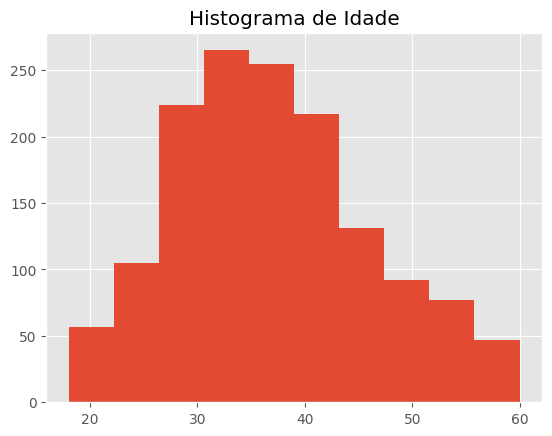

In [ ]:
_= plt.hist(rh.Age) #distribuição de idade

_= plt.title("Histograma de Idade")

Histograma de Idade

O histograma de idade mostra a distribuição das idades dos funcionários na empresa. Aqui estão alguns pontos chave a partir do gráfico:

Faixa Etária Dominante:

A maioria dos funcionários está na faixa etária de 25 a 45 anos. Isso sugere que a empresa tem uma força de trabalho relativamente jovem a meia-idade.

Menor Frequência em Idades Extremos:

Há menos funcionários nas faixas etárias de menos de 25 anos e mais de 50 anos. Isso pode indicar que a empresa tem menor recrutamento de funcionários muito jovens ou mais velhos, ou pode refletir taxas de rotatividade diferentes em várias faixas etárias.

Pico na Faixa dos 30 Anos:

O pico do histograma ocorre na faixa dos 30 anos. Esta faixa etária pode ser considerada um período de alta produtividade e desenvolvimento de carreira, o que pode ser um foco da empresa para recrutar e reter talentos.

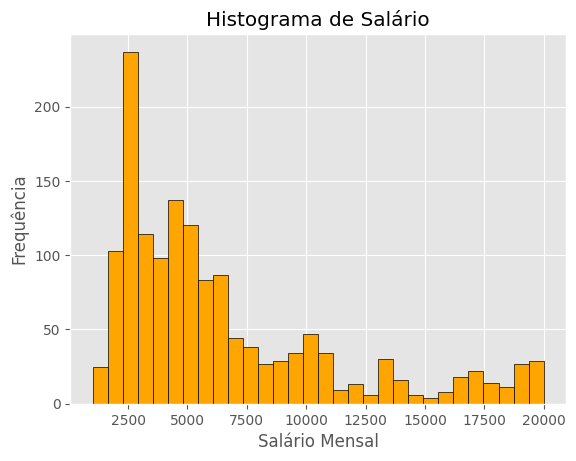

In [40]:
# Plotar o histograma com mais bins para melhorar a visualização da distribuição
plt.hist(rh.MonthlyIncome, bins=30, color='orange', edgecolor='black')

# Adicionar título e rótulos aos eixos
plt.title("Histograma de Salário")
plt.xlabel("Salário Mensal")
plt.ylabel("Frequência")

# Mostrar o gráfico
plt.show()

Histograma de Salário

O histograma de salário mostra a distribuição dos salários mensais dos funcionários na empresa. Aqui estão algumas observações importantes:

Assimetria à Direita:

O histograma é assimétrico à direita (ou seja, "puxado" para a direita), indicando que a maioria dos funcionários recebe salários mais baixos, enquanto há um número menor de funcionários que recebe salários significativamente mais altos.

Faixa de Salário Mais Comum:

A maior parte dos funcionários recebe entre 2.000 e 5.000 unidades monetárias. Isso sugere que a empresa tem uma grande proporção de funcionários em cargos com salários mais baixos ou médios.

Existência de Altos Salários:

Há uma cauda longa em direção aos salários mais altos, mostrando que há alguns funcionários que recebem salários muito elevados, possivelmente ocupando cargos de alta gerência ou especializados.

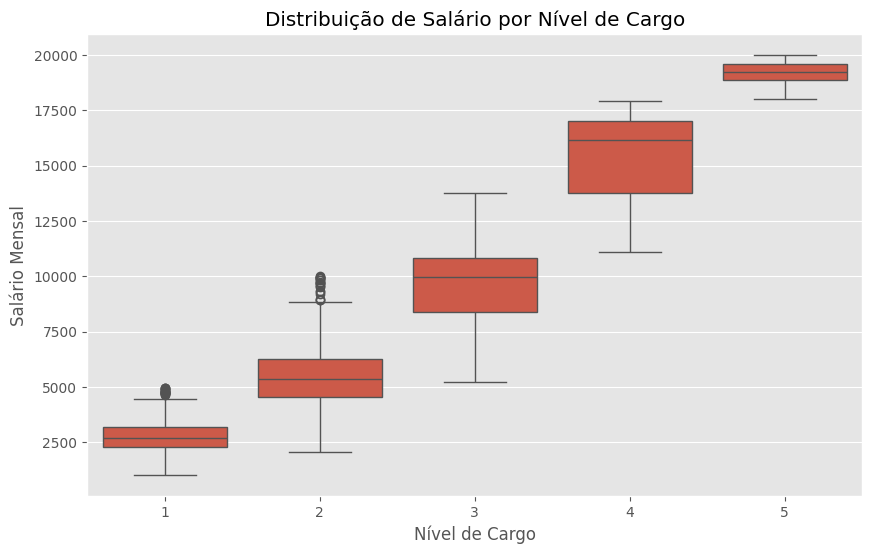

In [39]:
# Plotando a distribuição salarial por nível de cargo
plt.figure(figsize=(10, 6))
sns.boxplot(x='JobLevel', y='MonthlyIncome', data=rh)
plt.title('Distribuição de Salário por Nível de Cargo')
plt.xlabel('Nível de Cargo')
plt.ylabel('Salário Mensal')
plt.show()

Análise do Boxplot de Salário por Nível de Cargo

O gráfico é um boxplot que mostra a distribuição de salários mensais para diferentes níveis de cargo (representados pelos números 1 a 5).

Aqui está uma análise detalhada de cada nível:

1. Nível de Cargo 1

Distribuição Salarial: A maioria dos salários está concentrada entre 2.500 e 5.000.

Outliers: Há alguns outliers acima dessa faixa, indicando que alguns funcionários desse nível ganham significativamente mais do que a maioria.

2. Nível de Cargo 2

Distribuição Salarial: A faixa salarial se desloca para cima, com a maioria dos salários entre aproximadamente 4.000 e 7.500.
Outliers: Existem vários outliers acima de 7.500, indicando variação salarial dentro desse nível.

3. Nível de Cargo 3

Distribuição Salarial: Os salários estão entre 7.500 e 10.000, com a mediana perto de 8.000.

Outliers: Há poucos outliers, sugerindo uma distribuição salarial mais concentrada.

4. Nível de Cargo 4

Distribuição Salarial: A faixa salarial vai de aproximadamente 10.000 a 15.000, com uma mediana em torno de 12.500.

Outliers: Alguns outliers são visíveis, indicando variabilidade salarial, mas em menor quantidade comparado aos níveis anteriores.

5. Nível de Cargo 5

Distribuição Salarial: Este é o nível com os salários mais altos, variando entre 17.500 e 20.000, com uma mediana próxima de 18.000.

Outliers: Não há outliers significativos, indicando que os salários são mais uniformes nesse nível.

In [ ]:
rh.Gender.value_counts()

Gender
Male      882
Female    588
Name: count, dtype: int64

In [ ]:
rh.Gender.value_counts(1) #analisando em percentual de genero

Gender
Male      0.6
Female    0.4
Name: proportion, dtype: float64

In [ ]:
rh.EducationField.value_counts(1)

EducationField
Life Sciences       0.412245
Medical             0.315646
Marketing           0.108163
Technical Degree    0.089796
Other               0.055782
Human Resources     0.018367
Name: proportion, dtype: float64

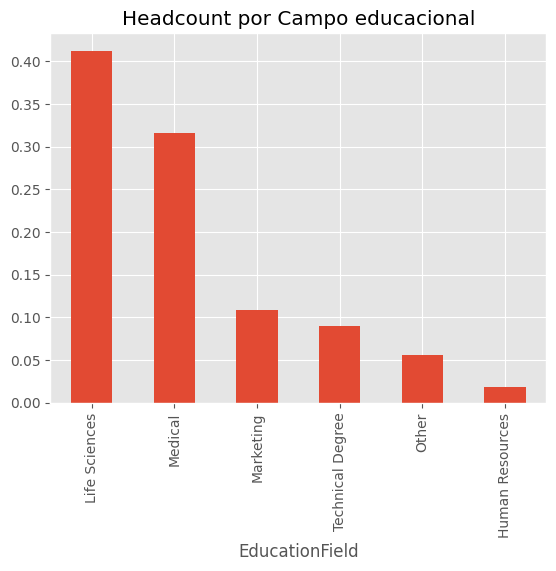

In [ ]:
_= rh.EducationField.value_counts(1).plot.bar()
_= plt.title("Headcount por Campo educacional")

Vemos que a maioria dos funcionário é formado na área de Life Sciences e na sequencia temos funcionário da área medical e marketing. Já a área com menos funcinários é Human Resources.

4 - Análise Bivariada (cruzar váriveis)

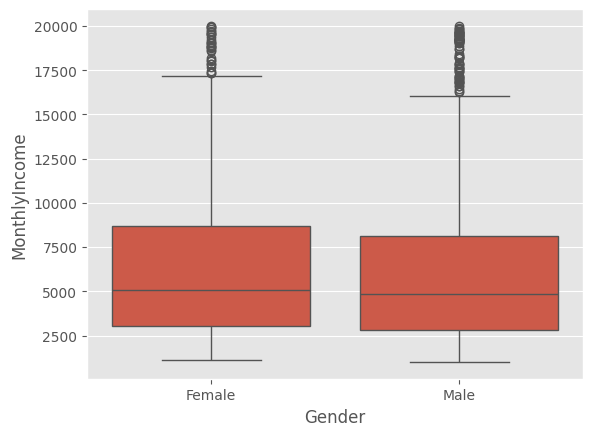

In [ ]:
_= sns.boxplot(x='Gender', y= 'MonthlyIncome', data=rh)

O que chama atenção é que a distribuição entre homens e mulheres é bem parecida e normamente espera-se encontrar salários maiores para homens. Porém, no caso da IBM, o gender gap parece não ocorrer

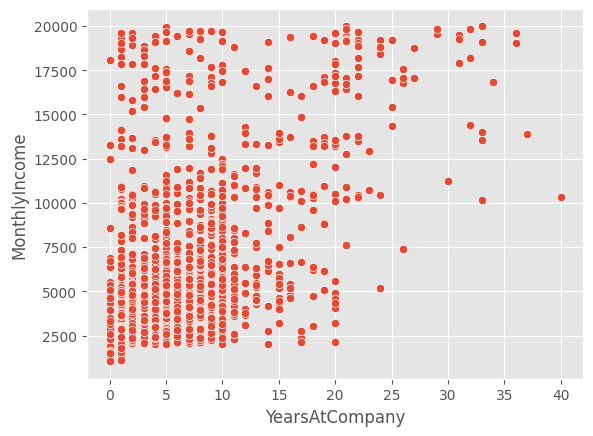

In [ ]:
#grafico de dispersão

_=sns.scatterplot(x="YearsAtCompany", y= 'MonthlyIncome', data = rh )

O tempo de empresa vs o salário parece não ter relação. Mostrando que quem transita entre empresas ganha mais

- Análise multivariada

In [35]:
num_rh = rh.select_dtypes(include=['float64', 'int64'])

corr = num_rh.corr()

corr

,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
Age,1.000000,0.010661,-0.001686,0.208034,NaN,-0.010145,0.010146,0.024287,0.029820,0.509604,...,0.053535,NaN,0.037510,0.680381,-0.019621,-0.021490,0.311309,0.212901,0.216513,0.202089
DailyRate,0.010661,1.000000,-0.004985,-0.016806,NaN,-0.050990,0.018355,0.023381,0.046135,0.002966,...,0.007846,NaN,0.042143,0.014515,0.002453,-0.037848,-0.034055,0.009932,-0.033229,-0.026363
DistanceFromHome,-0.001686,-0.004985,1.000000,0.021042,NaN,0.032916,-0.016075,0.031131,0.008783,0.005303,...,0.006557,NaN,0.044872,0.004628,-0.036942,-0.026556,0.009508,0.018845,0.010029,0.014406
Education,0.208034,-0.016806,0.021042,1.000000,NaN,0.042070,-0.027128,0.016775,0.042438,0.101589,...,-0.009118,NaN,0.018422,0.148280,-0.025100,0.009819,0.069114,0.060236,0.054254,0.069065
EmployeeCount,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
EmployeeNumber,-0.010145,-0.050990,0.032916,0.042070,NaN,1.000000,0.017621,0.035179,-0.006888,-0.018519,...,-0.069861,NaN,0.062227,-0.014365,0.023603,0.010309,-0.011240,-0.008416,-0.009019,-0.009197
EnvironmentSatisfaction,0.010146,0.018355,-0.016075,-0.027128,NaN,0.017621,1.000000,-0.049857,-0.008278,0.001212,...,0.007665,NaN,0.003432,-0.002693,-0.019359,0.027627,0.001458,0.018007,0.016194,-0.004999
HourlyRate,0.024287,0.023381,0.031131,0.016775,NaN,0.035179,-0.049857,1.000000,0.042861,-0.027853,...,0.001330,NaN,0.050263,-0.002334,-0.008548,-0.004607,-0.019582,-0.024106,-0.026716,-0.020123
JobInvolvement,0.029820,0.046135,0.008783,0.042438,NaN,-0.006888,-0.008278,0.042861,1.000000,-0.012630,...,0.034297,NaN,0.021523,-0.005533,-0.015338,-0.014617,-0.021355,0.008717,-0.024184,0.025976
JobLevel,0.509604,0.002966,0.005303,0.101589,NaN,-0.018519,0.001212,-0.027853,-0.012630,1.000000,...,0.021642,NaN,0.013984,0.782208,-0.018191,0.037818,0.534739,0.389447,0.353885,0.375281


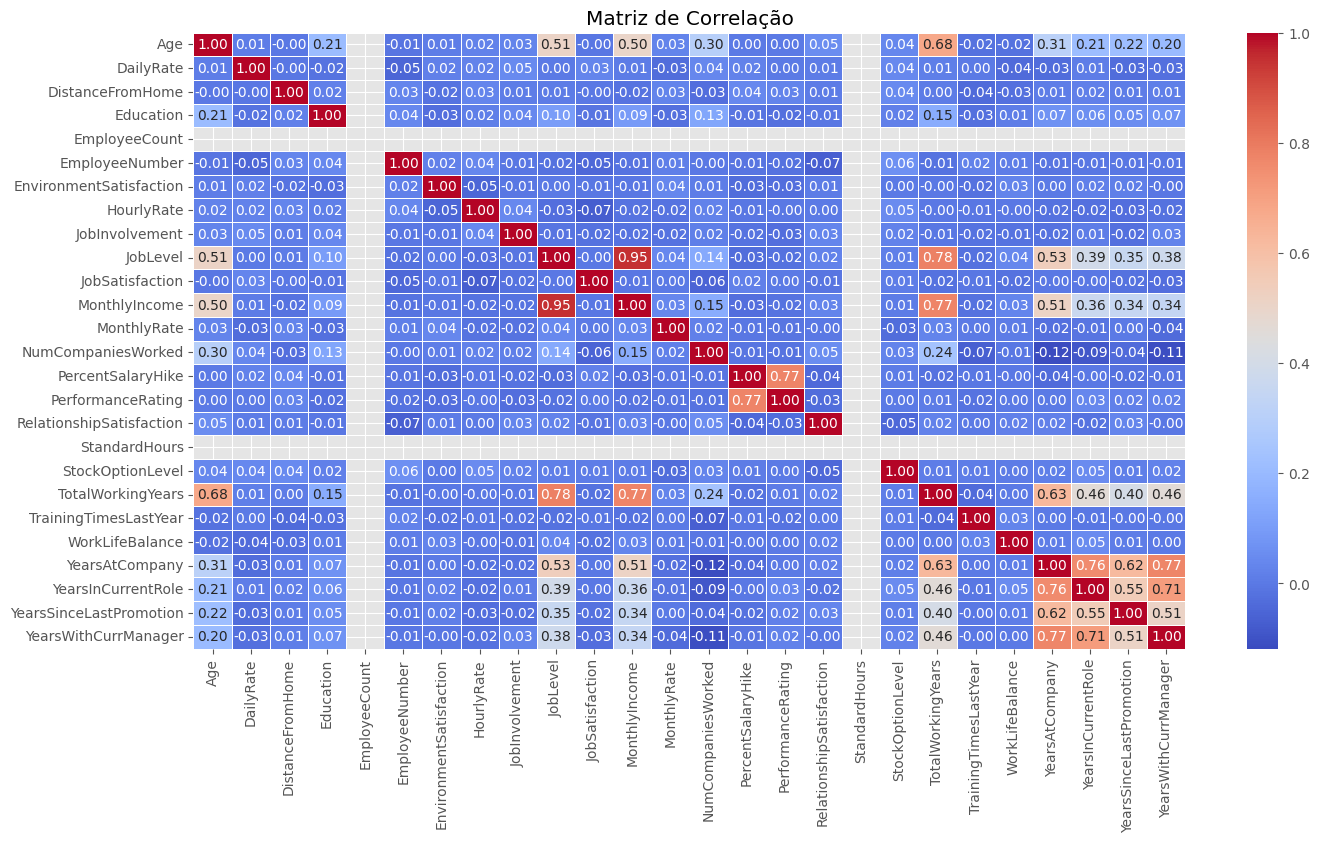

In [37]:
#plot da matrix geral

plt.figure(figsize=(16,8))
sns.heatmap(corr, annot=True, cmap='coolwarm',fmt=".2f", linewidths=0.5)
plt.title('Matriz de Correlação')
plt.show()

Análise da Matriz de Correlação


MonthlyIncome (Renda Mensal):


Correlação alta com JobLevel (0.95): Isso indica que conforme o nível do cargo aumenta, a renda mensal também aumenta significativamente, o que é esperado.
Correlação moderada com TotalWorkingYears (0.77): Trabalhadores com mais anos de experiência tendem a ter uma renda maior.

JobLevel (Nível do Cargo):

Correlação alta com MonthlyIncome (0.95).
Correlação moderada com TotalWorkingYears (0.78): O tempo total de trabalho na carreira está moderadamente correlacionado com o nível do cargo, sugerindo que experiência pode levar a promoções.

TotalWorkingYears (Anos Totais de Trabalho):

Correlação moderada com MonthlyIncome (0.77).
Correlação negativa com Age (-0.68): Isso pode indicar que, em média, funcionários mais jovens têm menos anos totais de trabalho, o que é esperado.

YearsAtCompany (Anos na Empresa):

Correlação moderada com YearsInCurrentRole (0.77): Indica que funcionários que estão na empresa há mais tempo tendem a estar em seu cargo atual por mais tempo.
Correlação moderada com YearsWithCurrManager (0.62): Indica que funcionários que estão na empresa há mais tempo tendem a ter o mesmo gerente por mais tempo.